In [1]:
#https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

import pickle

df1 = pd.read_csv(".\\csvs\\2018trans.csv")
df2 = pd.read_csv(".\\csvs\\2019trans.csv")
df3 = pd.read_csv(".\\csvs\\2020trans.csv")
df4 = pd.read_csv(".\\csvs\\extraData.csv")

df = pd.concat([df1,df2,df3,df4])
df.head()

,name,category
0,MCDONALD'S #2445,Restaurants
1,CORNER KITCHEN,Restaurants
2,JOHN JUAN BURGER & BURRIT,Restaurants
3,HEART & CROWN BYWARD M,Restaurants
4,UBER TRIP COTAA HELP.UB,Transportation


In [2]:
col = ['name', 'category']
df = df[col]
df = df[pd.notnull(df['name'])]
df.columns = ['name', 'category']
len(df.name.unique())

#df.category# = 
df.category = df.category.replace(to_replace ='#\w*\d+', value = '', regex = True)

In [3]:
df.name = df.name.replace(to_replace ='#\w*\d+', value = '', regex = True)

In [4]:
en = LabelEncoder()

df['category_id'] = en.fit_transform(df['category'])#df['category'].factorize()[0]
filename = r'.\saved\categoryEncoder.sav'
pickle.dump(en, open(filename, 'wb'))

df


,name,category,category_id
0,MCDONALD'S,Restaurants,3
1,CORNER KITCHEN,Restaurants,3
2,JOHN JUAN BURGER & BURRIT,Restaurants,3
3,HEART & CROWN BYWARD M,Restaurants,3
4,UBER TRIP COTAA HELP.UB,Transportation,6
...,...,...,...
41,EBOOK,Professional and Financial Services,2
42,EBOOK,Professional and Financial Services,2
43,UniversityOfWaterloo,Professional and Financial Services,2
44,EBOOK UniversityOfWaterloo,Professional and Financial Services,2


In [5]:
df.name

0            MCDONALD'S          
1       CORNER KITCHEN           
2       JOHN JUAN BURGER & BURRIT
3       HEART & CROWN BYWARD M   
4         UBER TRIP COTAA HELP.UB
                 ...             
41                          EBOOK
42                          EBOOK
43          UniversityOfWaterloo 
44    EBOOK  UniversityOfWaterloo
45                     University
Name: name, Length: 891, dtype: object

In [6]:
(df.groupby('category').name.count())

category
Amazon                                  19
Entertainment                           42
Professional and Financial Services     36
Restaurants                            644
Retail and Grocery                      76
SkipTheDishes                           17
Transportation                          57
Name: name, dtype: int64

In [7]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')

print(category_id_df.shape)
category_id_df.head(30)

(7, 2)


,category,category_id
13,Amazon,0
14,Entertainment,1
11,Professional and Financial Services,2
0,Restaurants,3
29,Retail and Grocery,4
12,SkipTheDishes,5
4,Transportation,6


In [8]:
category_to_id = dict(category_id_df.values)

#print(category_id_df.values)
#print(category_to_id)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
#print(id_to_category)

for cat,i in df.groupby('category'):
    print(cat)
    print(i)

Amazon
                          name category  category_id
13   Amazon.ca                   Amazon            0
16   Amazon *Marketplce CA       Amazon            0
80   Amazon *Marketplce CA       Amazon            0
105                     Amazon   Amazon            0
113                     amazon   Amazon            0
29   AMZN Mktp CA*7O0384J33      Amazon            0
31   AMZN Mktp CA*QG59I2S93      Amazon            0
37   AMZ*LoveRosmarinus          Amazon            0
59   AMZN Mktp CA*LR0F80RP3      Amazon            0
107  AMZ*PWR+                    Amazon            0
144  AMZN Mktp CA*MB4ZT8R60      Amazon            0
156  Amazon.ca*MI3TT2ZY1         Amazon            0
293  Amazon.ca*7C33O6K03         Amazon            0
294  Amazon.ca*TY9CS0G53         Amazon            0
419  Amazon.ca*MW5FC5AJ2         Amazon            0
5    Amazon.ca*W15OH6C83         Amazon            0
28   Amazon.ca*3Z03I2UD3         Amazon            0
180  AMZN Mktp CA*PX6B566D3      Amazon

In [9]:
print(df.groupby('category').name.count())

category
Amazon                                  19
Entertainment                           42
Professional and Financial Services     36
Restaurants                            644
Retail and Grocery                      76
SkipTheDishes                           17
Transportation                          57
Name: name, dtype: int64


In [10]:
#df.groupby('category').name['Personal and Household Expenses']
df[df['category_id'] == 2]

,name,category,category_id
11,CASH ADV/,Professional and Financial Services,2
74,-050 CITY OF OTTAWA,Professional and Financial Services,2
106,Aujla Saloon,Professional and Financial Services,2
107,Punjabi Barber,Professional and Financial Services,2
482,Amazon.ca Prime Member,Professional and Financial Services,2
14,DELL CANADA INC,Professional and Financial Services,2
26,MTO RUS - SO KINCARDINE,Professional and Financial Services,2
30,Amazon Channels,Professional and Financial Services,2
38,Amazon.ca Prime Member,Professional and Financial Services,2
47,UW WATCARD,Professional and Financial Services,2


In [11]:
df[df['category_id'] == 3]

,name,category,category_id
0,MCDONALD'S,Restaurants,3
1,CORNER KITCHEN,Restaurants,3
2,JOHN JUAN BURGER & BURRIT,Restaurants,3
3,HEART & CROWN BYWARD M,Restaurants,3
5,ZAK'S DINERS,Restaurants,3
...,...,...,...
193,BK # 25840,Restaurants,3
194,WENDY'S Q1R,Restaurants,3
195,BK # 25840,Restaurants,3
196,FIREHOUSE SUBS,Restaurants,3


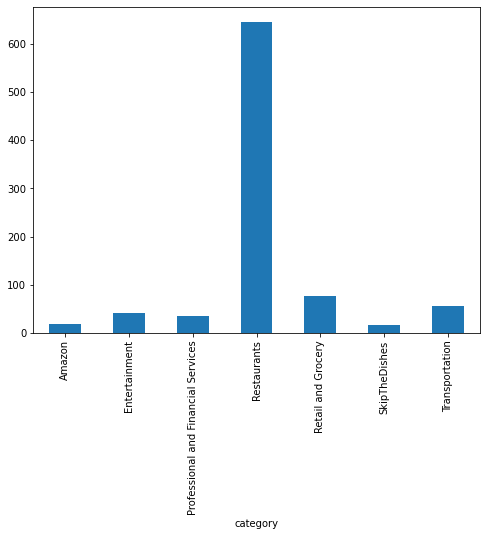

In [12]:

fig = plt.figure(figsize=(8,6))
df.groupby('category').name.count().plot.bar(ylim=0)
plt.show()

In [13]:
for i in (df.groupby('category')):
    print(i)
#print(df.groupby('category').name.count())


('Amazon',                           name category  category_id
13   Amazon.ca                   Amazon            0
16   Amazon *Marketplce CA       Amazon            0
80   Amazon *Marketplce CA       Amazon            0
105                     Amazon   Amazon            0
113                     amazon   Amazon            0
29   AMZN Mktp CA*7O0384J33      Amazon            0
31   AMZN Mktp CA*QG59I2S93      Amazon            0
37   AMZ*LoveRosmarinus          Amazon            0
59   AMZN Mktp CA*LR0F80RP3      Amazon            0
107  AMZ*PWR+                    Amazon            0
144  AMZN Mktp CA*MB4ZT8R60      Amazon            0
156  Amazon.ca*MI3TT2ZY1         Amazon            0
293  Amazon.ca*7C33O6K03         Amazon            0
294  Amazon.ca*TY9CS0G53         Amazon            0
419  Amazon.ca*MW5FC5AJ2         Amazon            0
5    Amazon.ca*W15OH6C83         Amazon            0
28   Amazon.ca*3Z03I2UD3         Amazon            0
180  AMZN Mktp CA*PX6B566D3      Am

In [14]:
#data cleaned model time 

#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 7), stop_words='english')

#features = tfidf.fit_transform(df.name).toarray()
#features

In [15]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['name'])
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

filename = r'.\saved\countVectorizer.sav'
pickle.dump(count_vect, open(filename, 'wb'))
filename = r'.\saved\tfidfTransformer.sav'
pickle.dump(tfidf_transformer, open(filename, 'wb'))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['category_id'], test_size=0.2, random_state = 0)


In [17]:
 #count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(X_train)
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts).toarray()
clf = MultinomialNB().fit(X_train,y_train)#(X_train_tfidf, y_train) 


In [18]:
#testing
#print(clf.predict(count_vect.transform(["uber"])))
#X_test_counts = count_vect.fit_transform(X_test)
#X_test_tfidf = tfidf_transformer.fit_transform(X_train_tfidf)
result = clf.predict(X_test)
print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))
print(accuracy_score(y_test, result))

[[  1   0   0   2   0   0   0]
 [  0   4   0   5   0   0   0]
 [  0   0   0   7   0   0   0]
 [  0   0   0 132   0   0   0]
 [  0   0   0   8   8   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   7   0   0   4]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.44      0.62         9
           2       0.00      0.00      0.00         7
           3       0.82      1.00      0.90       132
           4       1.00      0.50      0.67        16
           5       1.00      1.00      1.00         1
           6       1.00      0.36      0.53        11

    accuracy                           0.84       179
   macro avg       0.83      0.52      0.60       179
weighted avg       0.83      0.84      0.80       179

0.8379888268156425


c:\users\jasman singh sahi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
#tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
#X = tfidfconverter.fit_transform(X_train).toarray()
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)

In [20]:
classifier.fit(X_train, y_train)
filename = r'.\saved\RFclassifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
#X = tfidfconverter.fit_transform(X_test).toarray()
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  2   0   0   1   0   0   0]
 [  0   6   0   3   0   0   0]
 [  0   0   2   5   0   0   0]
 [  0   0   0 132   0   0   0]
 [  0   0   0   6  10   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   1   0   0  10]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         9
           2       1.00      0.29      0.44         7
           3       0.89      1.00      0.94       132
           4       1.00      0.62      0.77        16
           5       1.00      1.00      1.00         1
           6       1.00      0.91      0.95        11

    accuracy                           0.91       179
   macro avg       0.98      0.74      0.82       179
weighted avg       0.92      0.91      0.90       179

0.9106145251396648


In [23]:
# Pipeline
'''
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['name'])
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
'''
X_train2, X_test2, y_train2, y_test2 = train_test_split(df['name'], df['category_id'], test_size=0.2, random_state = 0)


rf_clf = Pipeline([('vect', count_vect),
                      ('tfidf', TfidfTransformer()),
                      ('rfc', RandomForestClassifier(n_estimators=1000, random_state=0))
])

rf_clf = rf_clf.fit(X_train2,y_train2)
filename = r'.\saved\rfPipeLine.sav'
pickle.dump(rf_clf, open(filename, 'wb'))

In [24]:
res = rf_clf.predict(X_test2)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
res

[[  2   0   0   1   0   0   0]
 [  0   6   0   3   0   0   0]
 [  0   0   2   5   0   0   0]
 [  0   0   0 132   0   0   0]
 [  0   0   0   6  10   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   1   0   0  10]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         9
           2       1.00      0.29      0.44         7
           3       0.89      1.00      0.94       132
           4       1.00      0.62      0.77        16
           5       1.00      1.00      1.00         1
           6       1.00      0.91      0.95        11

    accuracy                           0.91       179
   macro avg       0.98      0.74      0.82       179
weighted avg       0.92      0.91      0.90       179

0.9106145251396648


array([6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 6, 3,
       4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 6, 3, 6, 3, 3, 4, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 6, 5, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 6, 1, 3,
       3, 3, 3])

In [25]:
np.mean(res == y_test2)

0.9106145251396648